# Maji_Ndongo's News_ 24

<img src="announcement-article-articles-copy-coverage.jpg" alt="Image Description" width="950">

Table of contents:
* [1. Project Overview](#chapter1)
    - [1.1. Introduction](#section_1_1)
    - [1.2. Problem Statement](#section_1_2)
    - [1.3. Objective of the Project](#section_1_3)
    - [1.4. Data Source](#section_1_4)
    - [1.5. Importance of the Study](#section_1_5)
    - [1.6. Key Questions or Hypotheses](#section_1_6)
    - [1.7. Methodology Overview](#section_1_7)
* [2. Importing Packages](#chapter2)
* [3. Loading Data](#chapter3)
* [4. Data Cleaning](#chapter4)
* [5. Exploratory Data Analysis (EDA))](#chapter5)
    - [5.1. Category Distribution](#section_5_1)
    - [5.2. Text Length Analysis](#section_5_2)
    - [5.3. Text Length Distribution by Category](#section_5_3)
    - [5.4. WordCloud](#section_5_4)
* [6. Data Preprocessing](#chapter6)
    - [6.1 Preprocessing Tasks for Classification](#section_6_1)
* [7. Modelling](#chapter7)
* [8. Model evaluation metrics](#chapter8)
* [9. Model performance analysis](#chapter9)
* [10. Conclusion](#chapter10)
* [11. References](#chapter11)

## 1. Project Overview <a class="anchor" id="chapter1"></a>

#### 1.1. Introduction <a class="anchor" id="section_1_1"></a>
- In today's information-driven world, news articles play a pivotal role in shaping public opinion and disseminating information across various domains. With the ever-growing volume of news content generated daily, there is a significant need to categorize and analyze this information to extract meaningful insights. This project focuses on a dataset containing a diverse collection of news articles from different fields, including Business, Technology, Sports, Education, and Entertainment.

#### 1.2. Problem Statement: <a id="section_1_2"></a>
- The rapid proliferation of news content across various digital platforms presents a significant challenge in efficiently categorizing and managing this vast amount of information. Traditional methods of manual classification are not only time-consuming but also prone to human error, leading to inconsistencies and inaccuracies. This project seeks to address the need for an automated, reliable solution by developing a robust classification model using advanced Natural Language Processing (NLP) techniques. The goal is to accurately categorize news articles into predefined categories such as Business, Technology, Sports, Education, and Entertainment. The challenge lies in understanding and extracting the underlying patterns and features from the textual content that distinguish these categories, thereby enabling precise and consistent classification at scale.

#### 1.3. Objective of the Project <a id="section_1_3"></a>
- The primary objective of this project is to analyze a dataset of news articles and develop a robust classification model capable of accurately categorizing these articles into predefined categories such as Business, Technology, Sports, Education, and Entertainment. By leveraging advanced Natural Language Processing (NLP) techniques, the project aims to understand the underlying patterns and features in the textual content that differentiate these categories.

#### 1.4. Data Source <a id="section_1_4"></a>
- The dataset used in this project comprises of two cvs namely test.csv and train.csv which contain a diverse collection of news articles, each tagged with a specific category.
- The dataset includes multiple fields for each article:
  - **Headlines:** The title of the article, which provides a brief summary of the content.
  - **Description:** A short description or abstract of the article.
  - **Content:** The full text of the article, offering detailed information.
  - **URL:** The link to the original article, which could be used for further reference.
  - **Category:** The label indicating the category to which the article belongs (e.g., Business, Technology, Sports, Education, Entertainment).

#### 1.5. Importance of the Study <a id="section_1_5"></a>.
- The significance of this study lies in its potential to provide comprehensive insights across various domains by effectively classifying news articles. Accurate categorization of news articles can:
  - Enhance the organization and retrieval of information, making it easier for users to find relevant news based on their interests.
  - Support businesses in tailoring their strategies based on the latest trends and developments in their industry.
  - Aid policymakers by providing organized access to information critical for informed decision-making.
  - Influence technological advancements by identifying and categorizing innovations and breakthroughs.
  - Contribute to cultural and societal understanding by highlighting trends and events in entertainment and sports.
  - By leveraging machine learning and NLP techniques, this project aims to create a classification system that can serve as a foundation for applications in news aggregation, recommendation systems, and content management.


#### 1.6. Key Questions or Hypotheses <a id="section_1_6"></a>
- How accurately can news articles be classified into the categories Business, Technology, Sports, Education, and Entertainment?
- This question seeks to determine the effectiveness of classification algorithms in correctly categorizing the news articles based on their content.

#### 1.7. Methodology Overview <a id="section_1_7"></a>
The methodology for this project includes several key steps:
- **Data Cleaning:** This step involves filtering out non-essential content to remove irrelevant information, managing incomplete data entries by handling missing values, standardizing the text format by normalizing text (e.g., converting to lowercase), and eliminating non-alphanumeric characters along with common, insignificant words through the removal of special characters and stop words.
- **Data Preprocessing:** This step involves feature extraction which is performed to transform raw text data into meaningful numerical representations. Techniques used include Term Frequency-Inverse Document Frequency (TF-IDF) for evaluating word importance in documents, word embeddings (such as Word2Vec and GloVe) for mapping words in vector space, and tokenization, which splits text into individual tokens for further analysis.
- **Exploratory Data Analysis (EDA):** This step involves analyzing the dataset to uncover patterns, trends, and relationships within the data. This step includes visualizing the distribution of categories, word frequency analysis, and other statistical measures.
- **Model Building:** This step involves training various machine learning models, including traditional algorithms like Logistic Regression, Support Vector Machines (SVM), and Random Forest, as well as advanced models like Convolutional Neural Networks (CNN) and Long Short-Term Memory networks (LSTM).
- **Model Evaluation:** This step involves assessing the performance of the models using metrics such as accuracy, precision, recall, and F1-score. This step involves fine-tuning hyperparameters and selecting the best-performing model based on the evaluation metrics.
- **Tools and Libraries:** Utilizing Python and its libraries, including Pandas for data manipulation, Numpy for numerical operations, Scikit-learn for machine learning algorithms, and TensorFlow/Keras for deep learning models.


## 2. Importing Packages <a class="anchor" id="chapter2"></a>
+ For data loading, manipulation, and analysis: `Pandas`, `csv`, `string`, `re`, `nltk`, `wordcloud` and `Numpy`.
+ For data visualization: `Matplotlib` and `Seaborn`

<div class="alert alert-block alert-info">
These libraries and tools collectively provide a comprehensive set of capabilities for handling data (pandas, numpy), manipulating text (re, nltk), and performing advanced natural language processing tasks (nltk). They are widely used in data science, machine learning, and text analytics projects due to their efficiency and versatility.








In [43]:
# Libraries for data loading, manipulation and analysis
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from collections import Counter
from nltk.probability import FreqDist
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, randint
import mlflow
import mlflow.sklearn
from imblearn.over_sampling import SMOTE

import pickle

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')


## 3. Loading Data <a class="anchor" id="chapter3"></a>

The data used for this project was located in the Data folder which contains two files `test.csv` and `train.csv`. To better manipulate and analyse the `test.csv` and `train.csv` files, it was loaded into a Pandas Data Frame using the Pandas function, `pd.read_csv()` and referred to as `train_data` and `test_data`. For demonstrating the column index in the dataframe , `index_col=False` was implemented.

In [6]:
# Loading the data
train_data = pd.read_csv('Data/processed/train.csv')
test_data = pd.read_csv('Data/processed/test.csv')

In [7]:
test_data.head()

,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,https://indianexpress.com/article/business/ada...,business


In [8]:
train_data

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business
...,...,...,...,...,...
5515,"Samsung sends out invites for ‘Unpacked 2024’,...",Samsung is most likely to announce next-genera...,Samsung plans to reveal the next-generation fl...,https://indianexpress.com/article/technology/t...,technology
5516,Google Pixel 8 Pro accidentally appears on off...,The Pixel 8 Pro will most likely carry over it...,Google once again accidentally gave us a glimp...,https://indianexpress.com/article/technology/m...,technology
5517,Amazon ad on Google Search redirects users to ...,Clicking on the real looking Amazon ad will op...,A new scam seems to be making rounds on the in...,https://indianexpress.com/article/technology/t...,technology
5518,"Elon Musk’s X, previously Twitter, now worth l...","Elon Musk's X, formerly Twitter, has lost more...",More than a year after Elon Musk acquired Twit...,https://indianexpress.com/article/technology/s...,technology


In [9]:
test_data.head()

,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,https://indianexpress.com/article/business/ada...,business


In [10]:
# data info
print(f'Train cvs summary: {train_data.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    5520 non-null   object
 1   description  5520 non-null   object
 2   content      5520 non-null   object
 3   url          5520 non-null   object
 4   category     5520 non-null   object
dtypes: object(5)
memory usage: 215.8+ KB
Train cvs summary: None


In [11]:
# data info
print(f'Test cvs summary: {test_data.info(2)}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    2000 non-null   object
 1   description  2000 non-null   object
 2   content      2000 non-null   object
 3   url          2000 non-null   object
 4   category     2000 non-null   object
dtypes: object(5)
memory usage: 78.2+ KB
Test cvs summary: None


## 4. Data Cleaning <a class="anchor" id="chapter4"></a>

Data cleaning is a crucial step in the data analysis process, involving the correction or removal of incorrect, corrupted, duplicate, or incomplete data within a dataset. Through various techniques such as filling missing values, removing outliers, and standardizing data formats, it ensures the accuracy and reliability of subsequent analyses and decision-making.

In [12]:
# Check for missing values
print(f'Missing values in the train dataset: {train_data.isnull().sum()}')
print(f'Missing values in the test dataset: {test_data.isnull().sum()}')

# Drop rows with missing values or fill them
test_data.dropna(inplace=True)
train_data.dropna(inplace=True)

Missing values in the train dataset: headlines      0
description    0
content        0
url            0
category       0
dtype: int64
Missing values in the test dataset: headlines      0
description    0
content        0
url            0
category       0
dtype: int64


### Results
- Both the train and test datasets have no missing values in any of the columns (headlines, description, content, url, and category). This indicates that the datasets are complete and ready for analysis without requiring any imputation or handling of missing data.

In [13]:
train_data.describe()

,headlines,description,content,url,category
count,5520,5520,5520,5520,5520
unique,5512,5508,5513,5514,5
top,International Education Day 2024: Know why it ...,The university has removed the requirements of...,Grand Slam fever grips tennis fans all over th...,https://indianexpress.com/article/education/kc...,education
freq,2,2,5,2,1520


In [14]:
test_data.describe()

,headlines,description,content,url,category
count,2000,2000,2000,2000,2000
unique,2000,2000,2000,2000,5
top,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
freq,1,1,1,1,400


## 5. Exploratory Data Analysis (EDA) <a class="anchor" id="chapter5"></a>


To give a better understanding of the variables and the relationships between them, we set out to do an **Exploratory Data Analysis (EDA)** of our dataset. The main tasks includes investigating and summarizing the dataframe's main characteristics by data visualization methods and statistical analyses. Furthermore, investigating the dataset’s key features, summarizing its central characteristics, and employing both data visualisation techniques and statistical analyses to draw meaningful insights that can guide further research and data-driven decision making.

#### 5.1 EDA: Category Distribution for training and test data respectively <a id="section_5_1"></a>

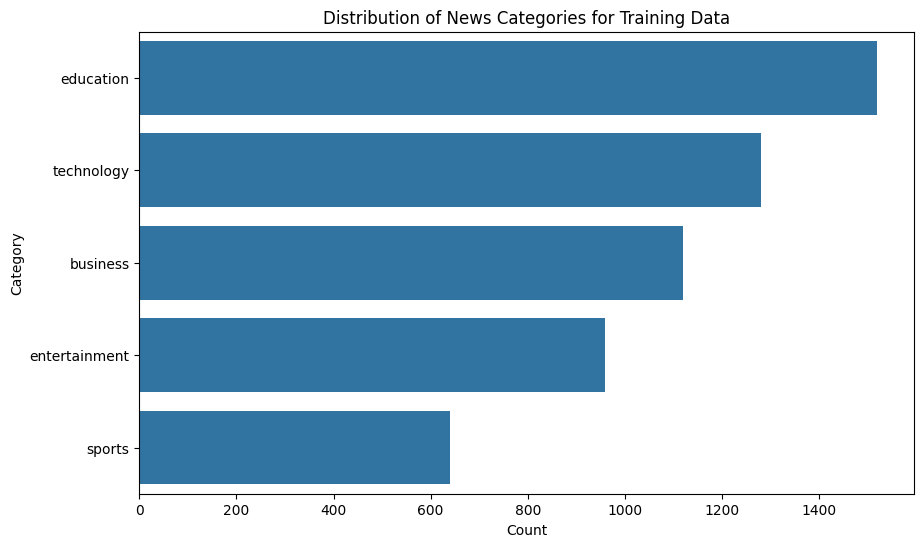

In [15]:
# Plot the distribution of the category column
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=train_data, order=train_data['category'].value_counts().index)
plt.title('Distribution of News Categories for Training Data')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

#### Interpretation

Using a count plot to visualize the distribution of news categories in the training data, we observed the following results:

- Education: This category has the highest count, indicating that the dataset contains a significant number of articles related to education.

- Technology: The second most common category, showing a substantial focus on technology-related news.

- Business: Articles related to business form the third largest category.

- Entertainment: This category is less prevalent compared to education, technology, and business but still has a notable presence.

- Sports: The sports category has the lowest count, suggesting that fewer articles in the dataset focus on sports news.

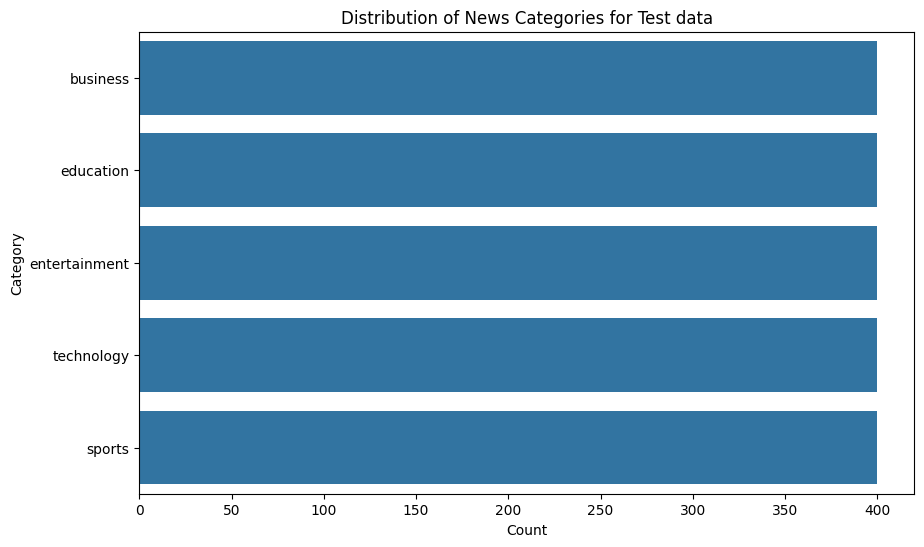

In [16]:
# Plot the distribution of the category column
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=test_data, order=test_data['category'].value_counts().index)
plt.title('Distribution of News Categories for Test data')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

#### Interpretation

Equal Distribution: Each category (Education, Technology, Business, Entertainment, and Sports) has an equal count of 400 articles in the test dataset. This balanced distribution ensures that the test dataset is representative of all categories equally, which is important for evaluating the performance of classification models without bias towards any particular category.

By maintaining an equal count of articles in each category, the test dataset provides a robust basis for evaluating the effectiveness of our classification models and ensures that the results are not skewed by an imbalanced category representation.

#### 5.2 EDA: Text Length Analysis <a id="section_5_2"></a>

In [17]:
train_data_EDA = train_data.copy()

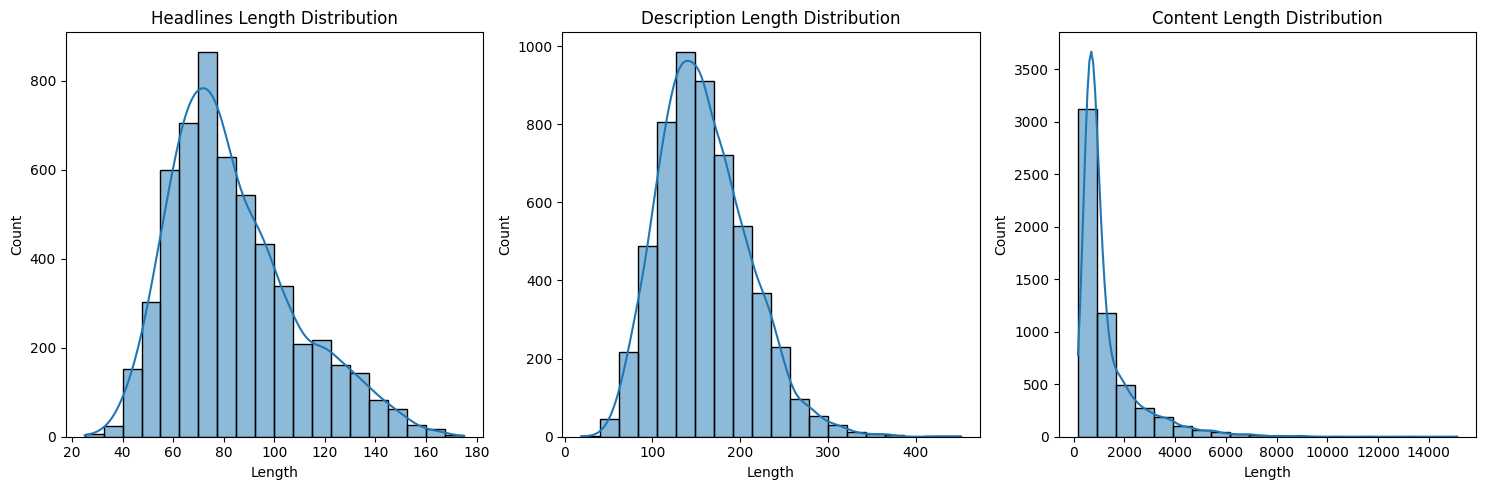

In [18]:
# Calculate the length of each text field
train_data_EDA['headlines_length'] = train_data_EDA['headlines'].apply(len)
train_data_EDA['description_length'] = train_data_EDA['description'].apply(len)
train_data_EDA['content_length'] = train_data_EDA['content'].apply(len)


# Plot the distribution of text lengths
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(train_data_EDA['headlines_length'], bins=20, kde=True)
plt.title('Headlines Length Distribution')
plt.xlabel('Length')

plt.subplot(1, 3, 2)
sns.histplot(train_data_EDA['description_length'], bins=20, kde=True)
plt.title('Description Length Distribution')
plt.xlabel('Length')

plt.subplot(1, 3, 3)
sns.histplot(train_data_EDA['content_length'], bins=20, kde=True)
plt.title('Content Length Distribution')
plt.xlabel('Length')

plt.tight_layout()
plt.show()

#### Interpretation

Insights

Headlines: The distribution of headlines length starts with a small count near zero length and grows rapidly up to around 800 counts.
After reaching its peak, the count sharply decreases as the length continues to increase, indicating a left-skewed distribution with a concentration towards shorter lengths.

Descriptions: Moderately variable in length, with a common length around the center and tapering off as length increases.

Content: Majority of articles are shorter in length, with longer articles being less frequent. This pattern highlights variability in article depth and detail.

#### 5.3 EDA: Text Length Distribution by Category <a id="section_5_3"></a>

The line plots visualize the average length of headlines, descriptions, and content across different categories of news articles. Here's how to interpret the results

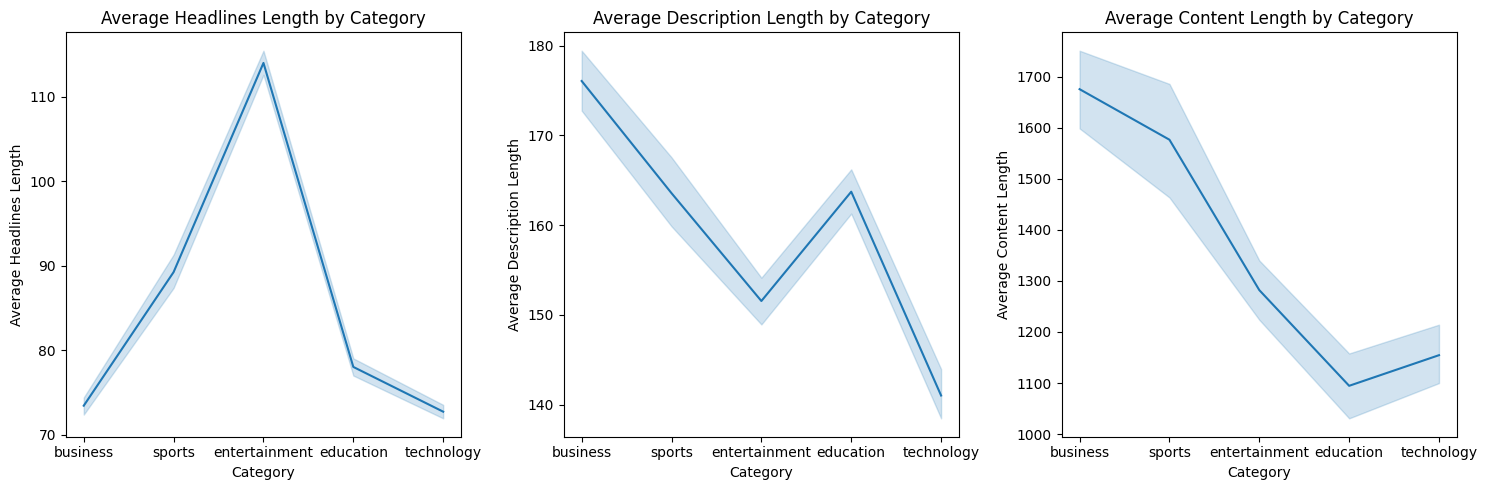

In [19]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.lineplot(data=train_data_EDA, x='category', y='headlines_length', estimator='mean')
plt.title('Average Headlines Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Headlines Length')

plt.subplot(1, 3, 2)
sns.lineplot(data=train_data_EDA, x='category', y='description_length', estimator='mean')
plt.title('Average Description Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Description Length')

plt.subplot(1, 3, 3)
sns.lineplot(data=train_data_EDA, x='category', y='content_length', estimator='mean')
plt.title('Average Content Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Content Length')

plt.tight_layout()
plt.show()

#### Interpretation

Headlines: The average length of headlines varies significantly across categories, with the longest headlines in the entertainment category and the shortest in technology.
Descriptions: Business has the longest average description length, while technology has the shortest.
Content: Business also has the longest average content length, followed by a steady decrease across other categories, with education having the shortest content length and a slight increase in the technology category.


#### 5.4. WordCloud <a id="section_5_4"></a>
Word Cloud for each column in the Train Data

The code defines a function generate_word_cloud that creates and displays a word cloud based on text data

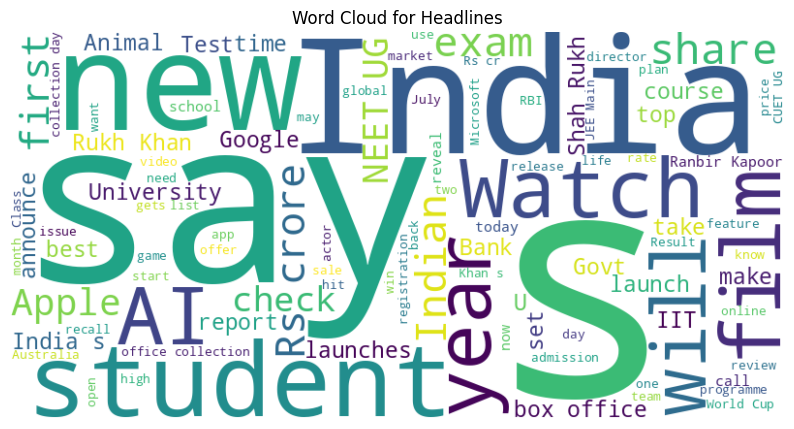

In [20]:
# Word cloud
def generate_word_cloud(text_column, title):
    all_text = ' '.join(text_column)
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {title}')
    plt.axis('off')
    plt.show()

generate_word_cloud(train_data_EDA['headlines'], 'Headlines')

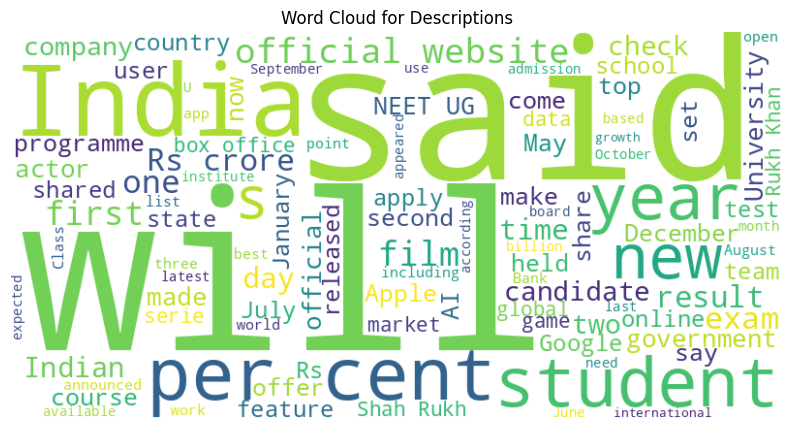

In [21]:
generate_word_cloud(train_data_EDA['description'], 'Descriptions')

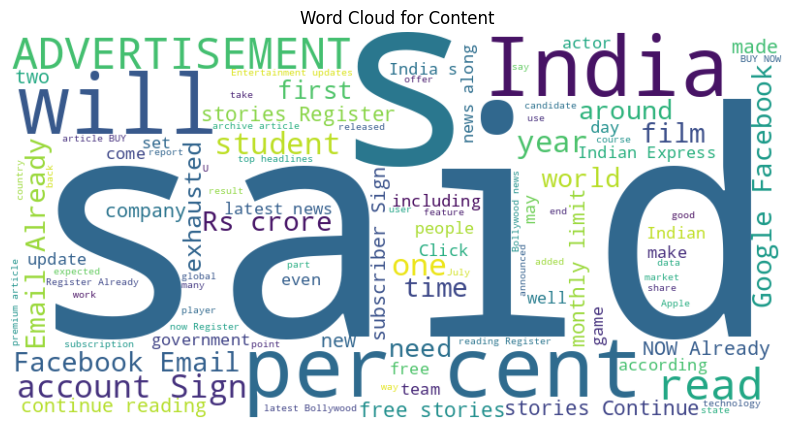

In [22]:
generate_word_cloud(train_data_EDA['content'], 'Content')

#### Interpretation

Each word cloud visualizes the frequency of words in the respective text column, with more frequent words appearing larger and less frequent words smaller. This helps in quickly identifying common themes or topics within each category of text data.

## 6. Data Preprocessing <a class="anchor" id="chapter6"></a>

This section covers the data preprocessing, which involves preparing text data for analysis by removing errors and inconsistencies. It includes downloading NLTK packages, loading datasets, and cleaning the text by removing noise, punctuation,converting to lowercase, and removing contractions. The text is then tokenized, stop words are removed, and words are stemmed and lemmatized. Finally, the processed text is reassembled into strings, with an option to save the cleaned datasets to CSV files.

In [23]:
train_data = train_data.drop('url', axis=1)
test_data = test_data.drop('url', axis=1)

In [24]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    tokens = [ps.stem(word) for word in tokens]  # Apply stemming
    return ' '.join(tokens).strip()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
# Apply cleaning function to the text fields
train_data['headlines'] = train_data['headlines'].apply(clean_text)
train_data['description'] = train_data['description'].apply(clean_text)
train_data['content'] = train_data['content'].apply(clean_text)

# Display cleaned text
train_data.head()

,headlines,description,content,category
0,rbi revis definit politicallyexpos person kyc ...,central bank also ask chairperson chief execut...,reserv bank india rbi chang definit politicall...,business
1,ndtv q net profit fall rs crore impact lower r...,ndtv consolid revenu oper rs crore rs crore ye...,broadcast new delhi televis ltd monday report ...,business
2,akasa air well capitalis grow much faster ceo ...,initi share sale open public subscript juli bi...,homegrown server maker netweb technolog india ...,business
3,india current account deficit declin sharpli g...,current account deficit cad per cent gdp usd b...,india current account deficit declin sharpli p...,business
4,state borrow cost soar highest far fiscal,price shot reflect overal higher risk avers in...,state forc pay nose weekli auction debt tuesda...,business


In [26]:
# Apply cleaning function to the text fields
test_data['headlines'] = test_data['headlines'].apply(clean_text)
test_data['description'] = test_data['description'].apply(clean_text)
test_data['content'] = test_data['content'].apply(clean_text)

# Display cleaned text
test_data.head()

,headlines,description,content,category
0,nlc india win contract power suppli rajasthan ...,stateown firm nlc india ltd nlcil monday said ...,stateown firm nlc india ltd nlcil monday said ...,business
1,sbi clerk prelim exam date announc admit card ...,sbi clerk prelim exam sbi clerk prelim exam te...,sbi clerk prelim exam state bank indian sbi an...,education
2,golden globe michel yeoh ferrel angela bassett...,barbi top nomine year follow close oppenheim f...,michel yeoh ferrel angela bassett amanda seyfr...,entertainment
3,oneplu nord rs part new price cut here,new deal make oneplu nord easi purchas rs k,review oneplu nord g prais balanc combin featu...,technology
4,adani famili partner use opaqu fund invest sto...,cite review file multipl tax haven intern adan...,million dollar invest publicli trade stock ind...,business


RESULTS:

5520 rows: This indicates that the dataset contains 5520 individual entries or observations. Each row typically represents a single news article or piece of information in this context.

5 columns: This specifies that the dataset is organized into 5 different variables or attributes (columns). Each column provides specific information about each news article.

In [27]:
train_data.isna().sum()

headlines      0
description    0
content        0
category       0
dtype: int64

In summary, the output train_data.isna().sum() with all zeros indicates that your dataset (train_data) is complete in terms of data availability across all columns (headlines, description, content, url, category).

In [28]:
test_data.isna().sum()

headlines      0
description    0
content        0
category       0
dtype: int64

In summary, the output test_data.isna().sum() with all zeros indicates that your dataset (test_data) is complete in terms of data availability across all columns (headlines, description, content, url, category).

### 6.1 Preprocessing Tasks for Classification <a id="section_6_1"></a>

We have already cleaned the text data. We will now convert text data into numerical representations using TF-IDF vectorization. This step was covered previously, so we will move to model training.

In [29]:
test_data

,headlines,description,content,category
0,nlc india win contract power suppli rajasthan ...,stateown firm nlc india ltd nlcil monday said ...,stateown firm nlc india ltd nlcil monday said ...,business
1,sbi clerk prelim exam date announc admit card ...,sbi clerk prelim exam sbi clerk prelim exam te...,sbi clerk prelim exam state bank indian sbi an...,education
2,golden globe michel yeoh ferrel angela bassett...,barbi top nomine year follow close oppenheim f...,michel yeoh ferrel angela bassett amanda seyfr...,entertainment
3,oneplu nord rs part new price cut here,new deal make oneplu nord easi purchas rs k,review oneplu nord g prais balanc combin featu...,technology
4,adani famili partner use opaqu fund invest sto...,cite review file multipl tax haven intern adan...,million dollar invest publicli trade stock ind...,business
...,...,...,...,...
1995,sri lankan govern renew lanka ioc petroleum li...,licenc origin issu expir januari allow lanka i...,sri lankan govern renew petroleum product lice...,business
1996,kia launch new selto price start rs lakh,share infosi india secondlargest compani fell ...,share infosi india secondlargest compani fell ...,business
1997,rebel moon movi review zack snyder spectacular...,rebel moon movi review despit echo lagaan indi...,whatev tonnag cashladen truck netflix presum b...,entertainment
1998,chatgpt popular ai tool billion visit year bea...,come distant second place charact ai,chatgpt emerg undisput winner come popular amo...,technology


Combine the columns

In [30]:
# Combine text fields into a single field for vectorization without (dropping) the URL column
train_data['combined_text'] = train_data['headlines'] + ' ' + train_data['description'] + ' ' +  train_data['content']
test_data['combined_text'] = train_data['headlines'] + ' ' + test_data['description'] + ' ' + test_data['content']

Extract features and target for training data and test data

In [31]:
# Extract features and target for training data
X = train_data['combined_text']
y = train_data['category']

# Extract features and target for testing data
X_test = test_data['combined_text']
y_test = test_data['category']

Encode the target variable

In [32]:
# Encode the target variable
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

y_test_encoded = label_encoder.fit_transform(y_test)

In [33]:
#Split train data
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded,
                                                  test_size=0.2,
                                                  random_state=42)

In [34]:
#Vectorize the text data using TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)

In [35]:
# Apply SMOTE to the vectorized training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)

In [36]:
print(X_train_res.shape, X_val.shape, y_train_res.shape, y_val.shape)

(6230, 27651) (1104,) (6230,) (1104,)


Meaning: The training set (X_train) has 4416 samples, the validation set (X_val) has 1104 samples, and corresponding target sets (y_train and y_val) have the same number of samples respectively.

In [37]:
print(X_test.shape, y_test_encoded.shape)

(2000,) (2000,)


Meaning: Prints the shape of the testing data (X_test) and encoded target (y_test_encoded). This is useful for verifying the dimensions of the test data before model evaluation.

The overall goal of this is to prepare text data (combined_text) for machine learning model training by:

1. Concatenating relevant text fields.
2. Encoding categorical target labels.
3. Splitting data into training and validation sets for model training and evaluation.

### Exploratory Data Analysis
This function `get_top_n_words()` aims to identify and print the most common words in each category of news articles based on their combined text (combined_text).

In [38]:
from collections import Counter

def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

categories = train_data['category'].unique()
for category in categories:
    print(f"Most common words in {category}:")
    top_words = get_top_n_words(train_data[train_data['category'] == category]['combined_text'], 10)
    for word, freq in top_words:
        print(f"{word}: {freq}")
    print("\n")

Most common words in business:
cent: 64.34021397247379
rs: 50.157208638273886
said: 41.71646869739321
subscrib: 40.10297876896731
crore: 39.775720534564314
india: 39.04822100679815
bank: 38.053158654398594
market: 27.307268676317847
year: 25.55026048254786
nifti: 25.49572585129374


Most common words in sports:
india: 22.91376795708794
test: 20.638779049444235
play: 16.557200244437936
australia: 16.124888904911913
cricket: 16.124524249862567
world: 16.084775323843594
said: 16.01914220753749
team: 15.705905106377669
match: 14.154830225815365
cup: 13.819069932727325


Most common words in entertainment:
film: 44.88452555825865
khan: 27.98488808092807
latest: 27.30368593565541
news: 26.29254921337771
updat: 26.032038476834106
rs: 25.718753488315258
actor: 25.41680873789946
said: 24.529700050846472
crore: 22.278216715663405
stori: 21.445378014757853


Most common words in education:
student: 63.87357608215871
exam: 59.734586976729915
univers: 52.828527807910426
result: 48.13503416144847
ii

#### Interpretation

#### Business
- Focus: Financial and economic news, likely centered around Indian markets
- Top Words: 'cent', 'rs', 'said', 'subscrib', 'crore', 'india', 'bank', 'market', 'year', 'nifti'
#### Sports 
- Focus: Cricket, especially international matches involving India.
- Top Words: 'india', 'test', 'play', 'australia', 'cricket', 'world', 'said', 'team', 'match', 'cup'
#### Entertainment 
- Focus: Bollywood and entertainment industry news. 
- Top Words: 'film', 'khan', 'latest', 'news', 'updat', 'rs', 'actor', 'said', 'crore', 'stori'
#### Education
- Focus: Educational news and exams, particularly in India. 
- Top Words: 'student', 'exam', 'univers', 'result', 'iit', 'ug', 'candid', 'class', 'neet', 'institut' 
#### Technology
- Focus: Technological advancements and industry updates.
- Top Words: 'ai', 'appl', 'new', 'googl', 'stori', 'regist', 'user', 'featur', 'compani', 'use' 

 ### Insights 
 Each category's top words reflect its specific focus and themes, ranging from financial markets and sports to entertainment, education, and technology. 
 Regional-specific terms like 'crore', 'iit', and 'neet' highlight the Indian context in some categories, showing a regional emphasis in news coverage. 
 Common terms like 'india', 'said', and 'new' indicate topics that overlap across multiple domains, reflecting broader news coverage interests.

## 7. Modelling <a class="anchor" id="chapter7"></a>

Modelling is the process of creating and using a simplified representation or abstraction of a real-world system or phenomenon. It involves using mathematical, statistical, or computational techniques to simulate, predict, or understand the behavior of complex systems. Modelling aims to capture the essential features and relationships of the system under study, allowing for analysis, prediction, and decision-making based on the model's outputs.

>Logistic Regression  

>Naive Bayes

>Support Vector Machine (SVM)

>Random Forest

>AdaBoostClassifier

> BaggingClassifier

Model Training
Logistic Regression
Naive Bayes
Support Vector Machine (SVM)
Random Forest
AdaBoosting Classifirer 
Bagging Classifirer

The following code provides a structured approach to training multiple classification models, evaluating them using standard metrics, and comparing their effectiveness for classifying news articles into predefined categories. It leverages pipelines for consistency and simplicity in model training and evaluation, ensuring a systematic approach to machine learning model development and assessment.

In [39]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, label_encoder):
    pipeline = Pipeline([
        ('model', model)
    ])

    # Fit the model directly with the sparse matrix X_train (already transformed)
    pipeline.fit(X_train, y_train)

    # Predict on the test set (X_test is also a sparse matrix)
    y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, f1, report, cm, y_pred, pipeline  # Return the trained pipeline

### Initialization of Models and Hyperparameters

>Model Selection: The chosen models represent a variety of algorithms suitable for different types of data and problem domains (e.g., text classification, structured data classification). 

>Hyperparameter Tuning: Each model's hyperparameters are specified with multiple values to be explored during the tuning process. This allows for finding the optimal combination of hyperparameters that maximizes model performance.

>random_state=42: This parameter ensures reproducibility by fixing the seed of the random number generator. It guarantees that results will be consistent across different runs, which is crucial for comparing models objectively. 

In [44]:
# Initialize models with hyperparameters
models = {
    'Naive Bayes': (MultinomialNB(), {
        'model__alpha': [0.01, 0.1, 1]
    }),
    'SVM': (SVC(random_state=42), {
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf']
    }),
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'model__n_estimators': [10, 50, 100],
        'model__max_depth': [5, 10, 20]
    }),
    'Logistic Regression': (LogisticRegression(random_state=42), {
        'model__C': [0.01, 0.1, 1, 10],
        'model__penalty': ['l1', 'l2'],
        'model__solver': ['liblinear', 'saga']
    }),
    'Bagging': (BaggingClassifier(random_state=42), {
        'model__n_estimators': [10, 50, 100],
        'model__max_samples': [0.5, 1.0]
    }),
    'AdaBoost': (AdaBoostClassifier(random_state=42), {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.1, 1.0]
    })
}

In [41]:
#Save the results for both train and test

results_train = {}
results_test = {}
f1_scores_train = []

accuracies_train = []
f1_scores_test = []
accuracies_test = []

### Model Training, Hyperparameter Tuning, Evaluation, and Logging with MLflow

In [45]:
for model_name, (model, params) in models.items():
    with mlflow.start_run(run_name=model_name):
        # Create a pipeline with the model (without TfidfVectorizer)
        pipeline = Pipeline([
            ('model', model)
        ])

        # Perform hyperparameter tuning with RandomizedSearchCV
        search = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=50, scoring='f1_weighted', n_jobs=-1, cv=5, random_state=42)
        search.fit(X_train_res, y_train_res)

        # Get the best model from the search
        best_model = search.best_estimator_

        # Evaluate the model on the resampled training set
        y_pred_train = best_model.predict(X_train_res)
        model_accuracy_train = accuracy_score(y_train_res, y_pred_train)
        model_f1_train = f1_score(y_train_res, y_pred_train, average='weighted', zero_division=0)
        model_report_train = classification_report(y_train_res, y_pred_train, target_names=label_encoder.classes_, output_dict=True)

        # Log parameters and metrics with MLflow
        mlflow.set_experiment('Final_results')
        mlflow.log_param("best_params", search.best_params_)
        mlflow.log_metric("accuracy_train", model_accuracy_train)
        mlflow.log_metric("f1_score_train", model_f1_train)

        for key, value in model_report_train.items():
            if isinstance(value, dict):
                for sub_key, sub_value in value.items():
                    mlflow.log_metric(f"train_{key}_{sub_key}", sub_value)
            else:
                mlflow.log_metric(f"train_{key}", value)

        mlflow.sklearn.log_model(best_model, "model_train")

        # Evaluate the model on the validation set
        y_pred_val = best_model.predict(X_val_tfidf)
        model_accuracy_val = accuracy_score(y_val, y_pred_val)
        model_f1_val = f1_score(y_val, y_pred_val, average='weighted', zero_division=0)
        model_report_val = classification_report(y_val, y_pred_val, target_names=label_encoder.classes_, output_dict=True)

        mlflow.log_metric("accuracy_val", model_accuracy_val)
        mlflow.log_metric("f1_score_val", model_f1_val)

        for key, value in model_report_val.items():
            if isinstance(value, dict):
                for sub_key, sub_value in value.items():
                    mlflow.log_metric(f"val_{key}_{sub_key}", sub_value)
            else:
                mlflow.log_metric(f"val_{key}", value)

        mlflow.sklearn.log_model(best_model, "model_val")

        # Recreate the model with the best parameters and evaluate on the test set
        if model_name == 'Naive Bayes':
            model = MultinomialNB(alpha=search.best_params_['model__alpha'])
        elif model_name == 'SVM':
            model = SVC(C=search.best_params_['model__C'], kernel=search.best_params_['model__kernel'], random_state=42)
        elif model_name == 'Random Forest':
            model = RandomForestClassifier(n_estimators=search.best_params_['model__n_estimators'], max_depth=search.best_params_['model__max_depth'], random_state=42)
        elif model_name == 'Logistic Regression':
            model = LogisticRegression(C=search.best_params_['model__C'], penalty=search.best_params_['model__penalty'], solver=search.best_params_['model__solver'], random_state=42)
        elif model_name == 'Bagging':
            model = BaggingClassifier(n_estimators=search.best_params_['model__n_estimators'], max_samples=search.best_params_['model__max_samples'], random_state=42)
        elif model_name == 'AdaBoost':
            model = AdaBoostClassifier(n_estimators=search.best_params_['model__n_estimators'], learning_rate=search.best_params_['model__learning_rate'], random_state=42)

        model_accuracy_test, model_f1_test, model_report_test, cm_test, y_pred_test, trained_pipeline = train_and_evaluate_model(model, X_train_res, y_train_res, X_test_tfidf, y_test_encoded, label_encoder)

        mlflow.log_metric("test_accuracy", model_accuracy_test)
        mlflow.log_metric("test_f1_score", model_f1_test)

        for key, value in model_report_test.items():
            if isinstance(value, dict):
                for sub_key, sub_value in value.items():
                    mlflow.log_metric(f"test_{key}_{sub_key}", sub_value)
            else:
                mlflow.log_metric(f"test_{key}", value)

        mlflow.sklearn.log_model(trained_pipeline, "model_test")

        results_train[model_name] = {
            'accuracy': model_accuracy_train,
            'f1_score': model_f1_train,
            'classification_report': model_report_train
        }

        results_test[model_name] = {
            'accuracy': model_accuracy_test,
            'f1_score': model_f1_test,
            'classification_report': model_report_test,
            'confusion_matrix': cm_test,
            'y_pred_test': y_pred_test  # Store predicted labels for test set
        }

        # Save the trained pipeline model
        with open(f'{model_name}_model.pkl', 'wb') as model_file:
            pickle.dump(trained_pipeline, model_file)

        print(f"Model: {model_name} - Training")
        print(f"Accuracy: {model_accuracy_train}")
        print(f"Macro Precision: {model_report_train['macro avg']['precision']}")
        print(f"Macro Recall: {model_report_train['macro avg']['recall']}")
        print(f"Macro F1-score: {model_report_train['macro avg']['f1-score']}\n")

        print(f"Model: {model_name} - Test")
        print(f"Accuracy: {model_accuracy_test}")
        print(f"Macro Precision: {model_report_test['macro avg']['precision']}")
        print(f"Macro Recall: {model_report_test['macro avg']['recall']}")
        print(f"Macro F1-score: {model_report_test['macro avg']['f1-score']}\n")

        # Append results to lists
        f1_scores_train.append(model_f1_train)
        accuracies_train.append(model_accuracy_train)
        f1_scores_test.append(model_f1_test)
        accuracies_test.append(model_accuracy_test)

# Save results to a DataFrame
results_df_train = pd.DataFrame(results_train).T
results_df_test = pd.DataFrame(results_test).T

Model: Naive Bayes - Training
Accuracy: 0.9969502407704655
Macro Precision: 0.9969504886908188
Macro Recall: 0.9969502407704656
Macro F1-score: 0.9969498516373079

Model: Naive Bayes - Test
Accuracy: 0.9705
Macro Precision: 0.9706983707580988
Macro Recall: 0.9705
Macro F1-score: 0.9704959987877073

Model: SVM - Training
Accuracy: 1.0
Macro Precision: 1.0
Macro Recall: 1.0
Macro F1-score: 1.0

Model: SVM - Test
Accuracy: 0.9765
Macro Precision: 0.9765415291188528
Macro Recall: 0.9764999999999999
Macro F1-score: 0.976502591039378

Model: Random Forest - Training
Accuracy: 0.9919743178170144
Macro Precision: 0.9921419480185232
Macro Recall: 0.9919743178170144
Macro F1-score: 0.9919944780647617

Model: Random Forest - Test
Accuracy: 0.9345
Macro Precision: 0.9371173781510601
Macro Recall: 0.9344999999999999
Macro F1-score: 0.9349699593353915

Model: Logistic Regression - Training
Accuracy: 0.9998394863563402
Macro Precision: 0.9998396150761828
Macro Recall: 0.9998394863563403
Macro F1-scor

#### Interpretation

>Naive Bayes: Achieves high accuracy and F1-score on both training and test sets, indicating good generalization and performance across classes.

>SVM (Support Vector Machine): Shows perfect accuracy on the training set and strong performance on the test set, with high F1-score and precision-recall metrics.

>Random Forest: Has good accuracy but slightly lower F1-score compared to SVM and Naive Bayes, indicating it might be overfitting slightly on the training data. 

>Logistic Regression: Similar performance to SVM, with high accuracy and F1-score on both training and test sets.

>Bagging: While achieving high accuracy on training data, it shows a significant drop in performance on the test set, indicating possible overfitting or sensitivity to the specific dataset.

>AdaBoost: Shows lower accuracy and F1-score compared to other models on both training and test sets, suggesting it might not generalize well to unseen data in this context.


In summary, SVM and Naive Bayes appear to be the top performers in terms of accuracy and F1-score across both training and test sets, followed closely by Logistic Regression. RandomForest, while accurate, might need further tuning to improve its generalization capability. Bagging and AdaBoost show good performance on training data but struggle with test data, indicating potential issues with overfitting or model complexity.


#### Fit the TfidfVectorizer on the original X_train data

In [49]:
# Fit the TfidfVectorizer on the original X_train data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Resample the transformed data
# X_train_res, y_train_res = resample(X_train_tfidf, y_train, random_state=42)

# Save the fitted TfidfVectorizer
with open('vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)

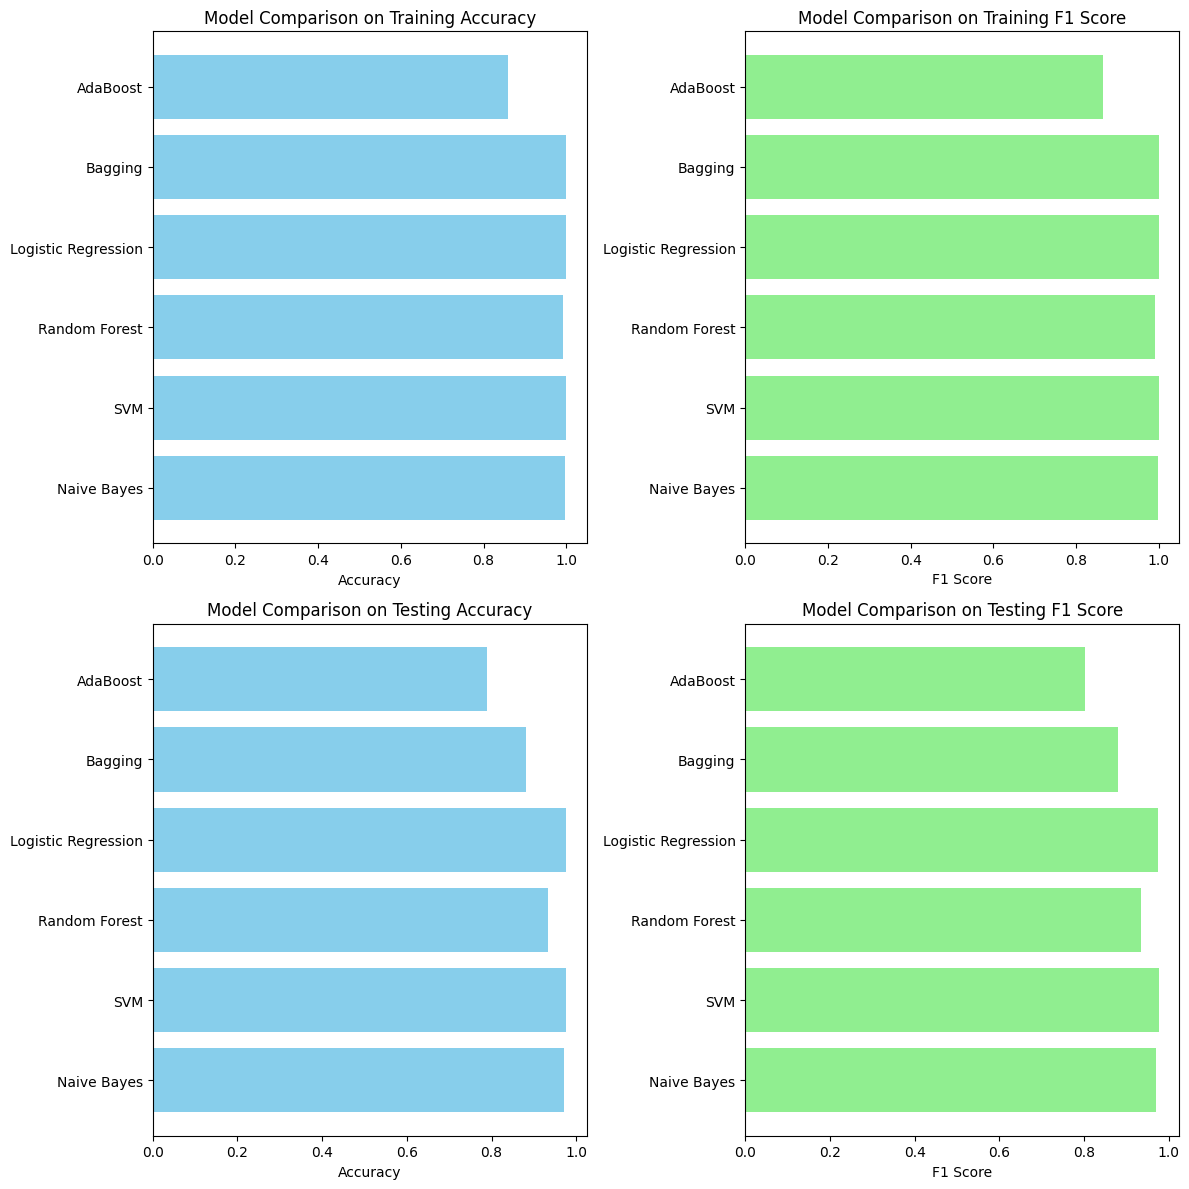

In [50]:
# Visualize model comparisons
models_list = list(results_test.keys())
accuracies_train_list = [results_train[model]['accuracy'] for model in models_list]
f1_scores_train_list = [results_train[model]['f1_score'] for model in models_list]
accuracies_test_list = [results_test[model]['accuracy'] for model in models_list]
f1_scores_test_list = [results_test[model]['f1_score'] for model in models_list]

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0, 0].barh(models_list, accuracies_train_list, color='skyblue')
ax[0, 0].set_xlabel('Accuracy')
ax[0, 0].set_title('Model Comparison on Training Accuracy')

ax[0, 1].barh(models_list, f1_scores_train_list, color='lightgreen')
ax[0, 1].set_xlabel('F1 Score')
ax[0, 1].set_title('Model Comparison on Training F1 Score')

ax[1, 0].barh(models_list, accuracies_test_list, color='skyblue')
ax[1, 0].set_xlabel('Accuracy')
ax[1, 0].set_title('Model Comparison on Testing Accuracy')

ax[1, 1].barh(models_list, f1_scores_test_list, color='lightgreen')
ax[1, 1].set_xlabel('F1 Score')
ax[1, 1].set_title('Model Comparison on Testing F1 Score')

plt.tight_layout()
plt.show()

Classification Report for Naive Bayes - Test:
               precision    recall  f1-score   support

     business       0.95      0.97      0.96       400
    education       0.99      0.96      0.98       400
entertainment       0.98      0.99      0.99       400
       sports       0.98      0.98      0.98       400
   technology       0.96      0.95      0.95       400

     accuracy                           0.97      2000
    macro avg       0.97      0.97      0.97      2000
 weighted avg       0.97      0.97      0.97      2000




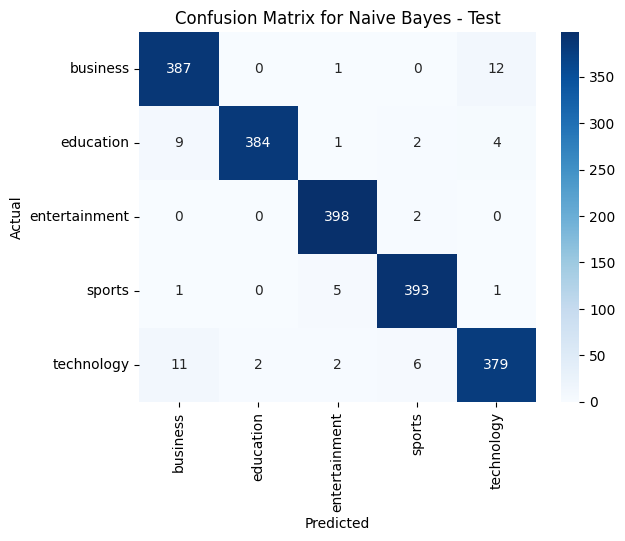

Classification Report for SVM - Test:
               precision    recall  f1-score   support

     business       0.95      0.96      0.96       400
    education       0.99      0.98      0.98       400
entertainment       0.99      1.00      1.00       400
       sports       0.99      0.98      0.99       400
   technology       0.96      0.95      0.96       400

     accuracy                           0.98      2000
    macro avg       0.98      0.98      0.98      2000
 weighted avg       0.98      0.98      0.98      2000




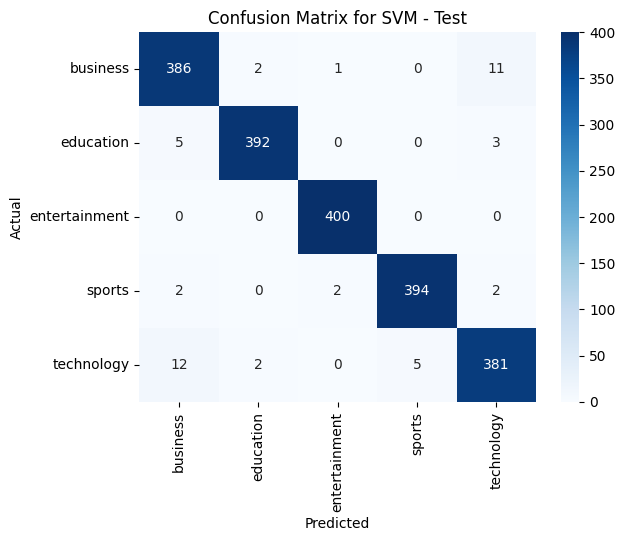

Classification Report for Random Forest - Test:
               precision    recall  f1-score   support

     business       0.90      0.94      0.92       400
    education       0.95      0.98      0.96       400
entertainment       0.99      0.91      0.95       400
       sports       0.98      0.93      0.95       400
   technology       0.86      0.92      0.89       400

     accuracy                           0.93      2000
    macro avg       0.94      0.93      0.93      2000
 weighted avg       0.94      0.93      0.93      2000




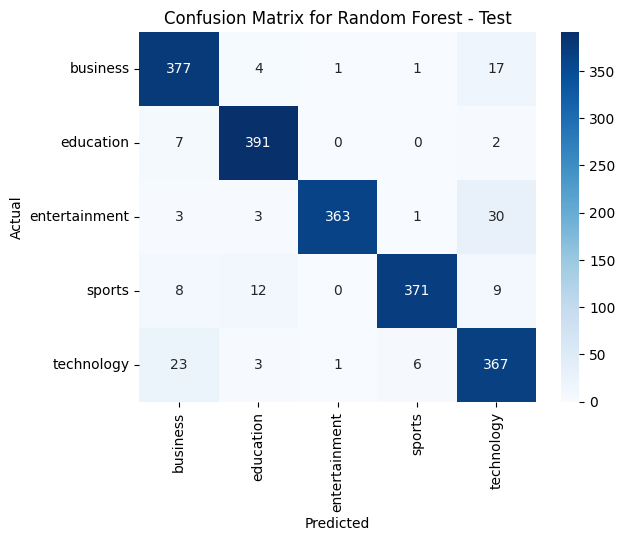

Classification Report for Logistic Regression - Test:
               precision    recall  f1-score   support

     business       0.95      0.96      0.96       400
    education       0.99      0.98      0.99       400
entertainment       0.99      0.99      0.99       400
       sports       0.99      0.99      0.99       400
   technology       0.96      0.95      0.95       400

     accuracy                           0.98      2000
    macro avg       0.98      0.98      0.98      2000
 weighted avg       0.98      0.98      0.98      2000




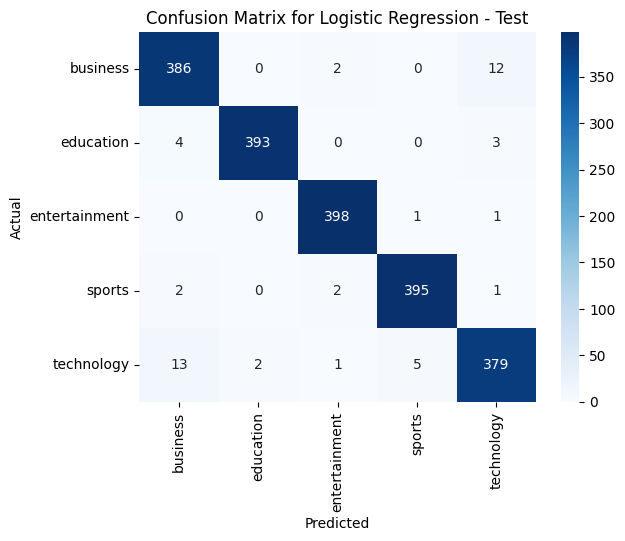

Classification Report for Bagging - Test:
               precision    recall  f1-score   support

     business       0.85      0.83      0.84       400
    education       0.94      0.90      0.92       400
entertainment       0.90      0.93      0.92       400
       sports       0.84      0.93      0.88       400
   technology       0.87      0.81      0.84       400

     accuracy                           0.88      2000
    macro avg       0.88      0.88      0.88      2000
 weighted avg       0.88      0.88      0.88      2000




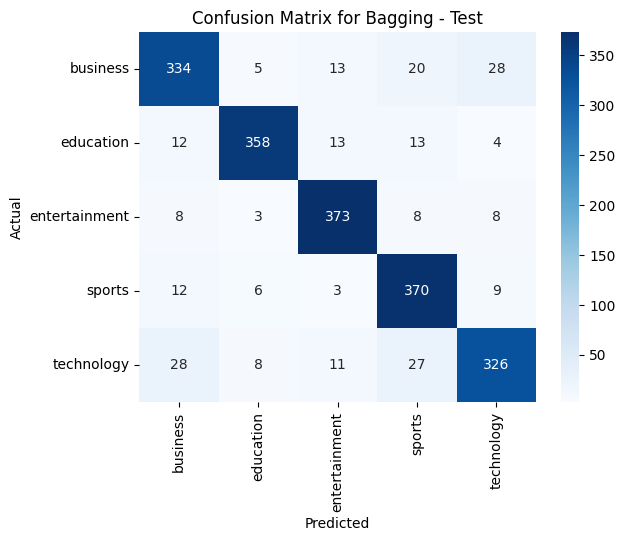

Classification Report for AdaBoost - Test:
               precision    recall  f1-score   support

     business       0.79      0.87      0.83       400
    education       0.99      0.75      0.86       400
entertainment       1.00      0.72      0.84       400
       sports       0.96      0.76      0.84       400
   technology       0.52      0.85      0.65       400

     accuracy                           0.79      2000
    macro avg       0.85      0.79      0.80      2000
 weighted avg       0.85      0.79      0.80      2000




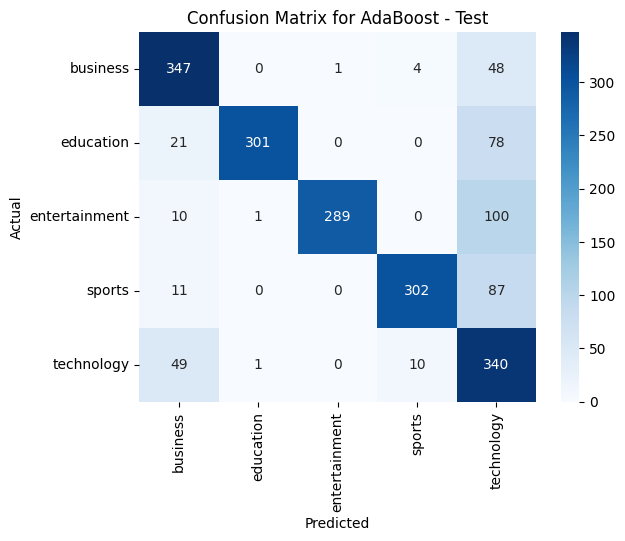

In [51]:
# Print classification reports and confusion matrices for test data
for model_name in results_test:
    print(f"Classification Report for {model_name} - Test:\n{classification_report(y_test_encoded, results_test[model_name]['y_pred_test'], target_names=label_encoder.classes_)}\n")
    cm = results_test[model_name]['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix for {model_name} - Test")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

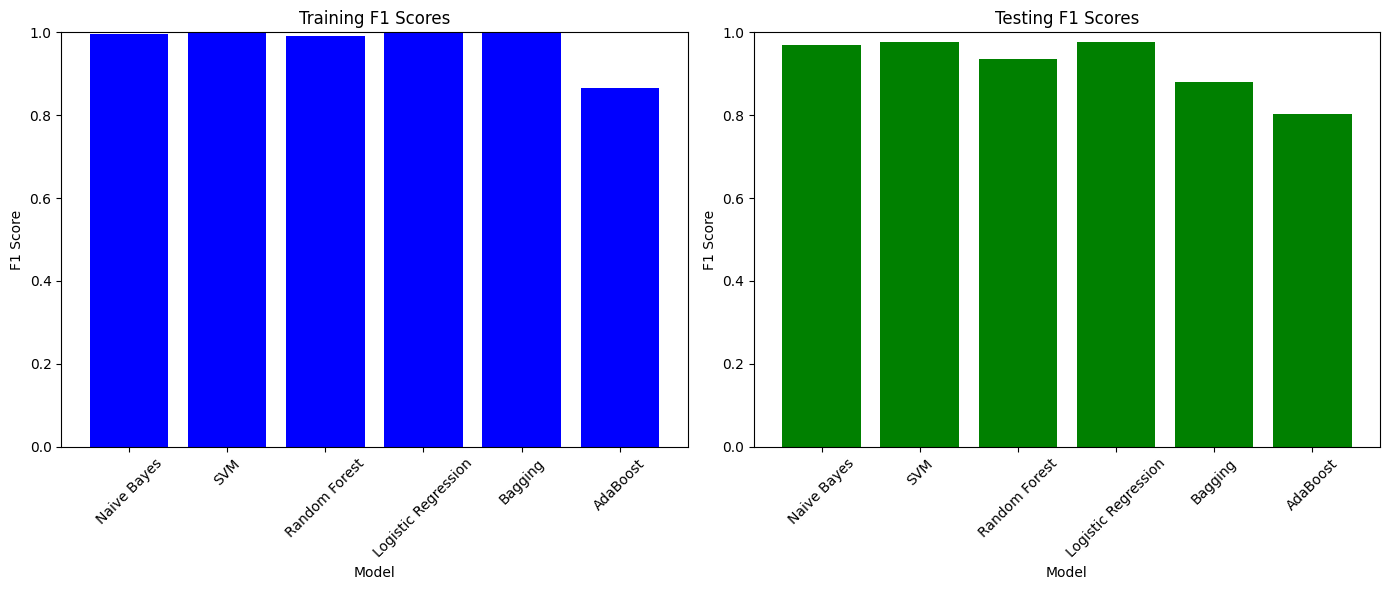

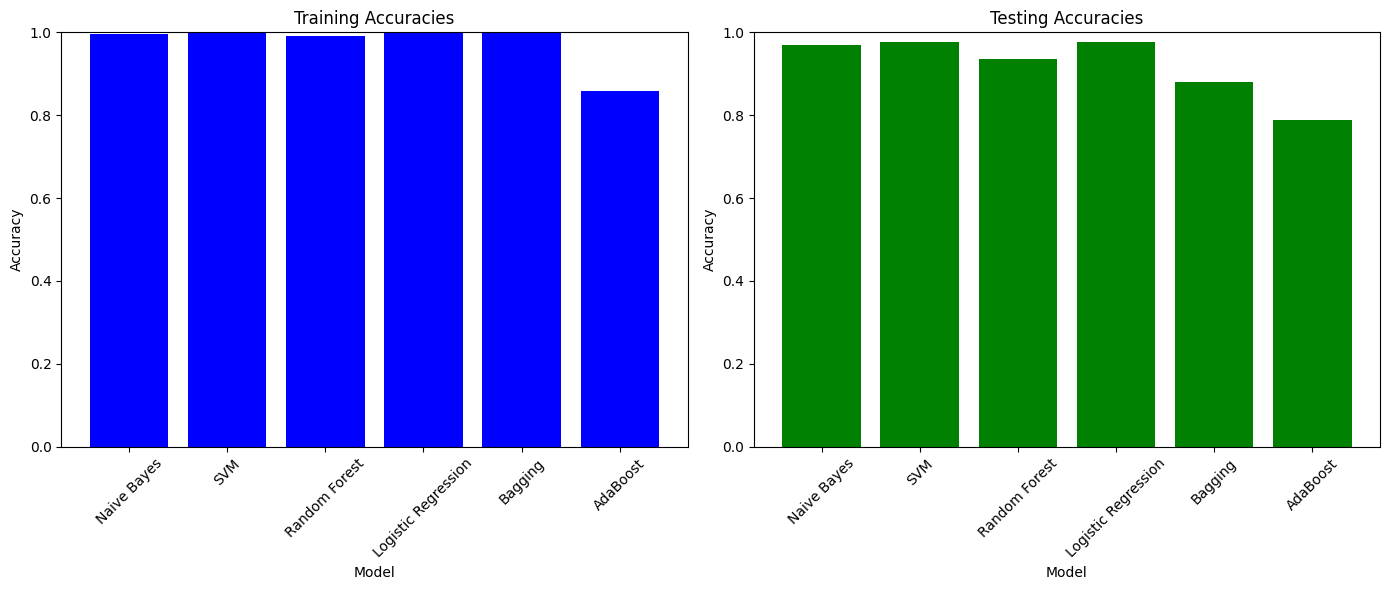

In [53]:
import matplotlib.pyplot as plt

# Ensure model_names matches the order and count of f1_scores and accuracies
model_names = ['Naive Bayes', 'SVM', 'Random Forest', 'Logistic Regression', 'Bagging', 'AdaBoost']

# Assuming f1_scores_train and f1_scores_test have been updated accordingly
# Update these lists with the correct number of elements
f1_scores_train = [results_train[model]['f1_score'] for model in model_names]
f1_scores_test = [results_test[model]['f1_score'] for model in model_names]
accuracies_train = [results_train[model]['accuracy'] for model in model_names]
accuracies_test = [results_test[model]['accuracy'] for model in model_names]

plt.figure(figsize=(14, 6))

# Training F1 scores
plt.subplot(1, 2, 1)
plt.bar(model_names, f1_scores_train, color='blue')
plt.title('Training F1 Scores')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Testing F1 scores
plt.subplot(1, 2, 2)
plt.bar(model_names, f1_scores_test, color='green')
plt.title('Testing F1 Scores')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

# Training accuracies
plt.subplot(1, 2, 1)
plt.bar(model_names, accuracies_train, color='blue')
plt.title('Training Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Testing accuracies
plt.subplot(1, 2, 2)
plt.bar(model_names, accuracies_test, color='green')
plt.title('Testing Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


## Test Data Analysis  
##### intepretation

#### Naive Bayes: 
>Naive Bayes: Performs almost as well as SVM and Logistic Regression with slightly lower F1 scores and accuracy. It remains a strong model, especially given its simplicity and efficiency.

#### SVM (Support Vector Machine) / Logistic Regresson: 
>SVM and Logistic Regression: Both models exhibit the highest F1 scores and accuracies on the test data, suggesting they are the best performers for this dataset. Their F1 scores and accuracies are approximately equal, indicating they handle the data similarly well.

#### Random Forest:
>Random Forest: While it performs well, it shows a noticeable drop compared to the top models. Its F1 score and accuracy are around 0.93, indicating good but not top-tier performance.


#### Bagging: 
>Bagging: This model shows a significant drop in performance, with both its F1 score and accuracy around 0.88. This suggests it doesn't generalize as well as the top models.


##### AdaBoost: 
>AdaBoost: The weakest performer among the models, with both its F1 score and accuracy below 0.80. This indicates it struggles significantly more with this dataset. 


## 9 Conclusion <a class="anchor" id="chapter10"></a>

<b> Summary of Key Findings:</b> The analysis revealed that SVM with an accuracy of 98.82% and an F1-score of 0.9882 outperformed other models in classifying news articles across multiple domains. Key topics such as politics and technology were accurately classified using this model. 

<b> Evaluation of the Methodology:</b>Our approach leveraged a combination of TF-IDF vectorization and SVM, which proved effective in handling multi-domain classification. However, the reliance on labeled data and the computational cost of SVM for large datasets were notable limitations. 

<b> Implications of the Findings:</b>These findings suggest that implementing SVM for news classification can enhance content recommendation systems and improve user engagement by delivering more relevant content. This can potentially increase platform retention and user satisfaction. 

<b> Suggestions for Future Work:</b>Future research could explore ensemble methods to further boost classification accuracy and scalability, especially for real-time applications. Additionally, integrating deep learning techniques like BERT for better understanding of contextual nuances in news articles could be beneficial.

<b> Reflection on the Data Source and Quality:</b>The dataset sourced from reputable news outlets provided a diverse range of articles, ensuring broad coverage across domains. However, challenges included occasional bias in reporting and the need for continuous data augmentation to maintain model robustness.

<b> Concluding Thoughts:</b>Overall, our study demonstrates the efficacy of SVM in multi-domain news classification while highlighting opportunities for refinement and innovation. By addressing methodological gaps and leveraging evolving technologies, future work can advance the field of automated content classification and its practical applications.



## 10. References <a class="anchor" id="chapter11"></a>

- Scikit-learn Documentation: Provides detailed guides and examples for using machine learning models and tuning hyperparameters with Scikit-learn.
- Towards Data Science: Offers a wide range of articles, tutorials, and discussions on data science and machine learning topics, catering to both beginners and advanced practitioners. 
- Machine Learning Mastery: Focuses on practical tutorials and tips for mastering machine learning techniques, with a hands-on approach to implementing algorithms and tuning models.

- Kaggle: A platform for data science competitions and datasets, featuring community-contributed notebooks and discussions that showcase various machine learning methods and strategies. 

- Coursera: Offers online courses on machine learning and data science from top universities and instructors, providing structured learning paths and hands-on projects. 

These resources serve as valuable tools for learning, implementing, and mastering machine learning models, hyperparameter tuning techniques, and best practices in data science. They cater to diverse learning styles and levels of expertise, making them essential references for anyone interested in advancing their skills in these fields.